In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [597]:
df = pd.read_csv("dataset.csv")

# Cleaning the dataset

In [598]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### Checking for any duplicate records

In [599]:
df = df.drop(columns=['id'])
df.duplicated().any()

False

### Converting the 'null' values in BMI to the median value

In [600]:
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']]).ravel()
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Converting the 'ever_married' column to int64 datatype where 1 represents 'yes' and 0 represents 'no'

In [601]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}).astype('int64')
df['ever_married'].info()
df.head(10)

<class 'pandas.core.series.Series'>
RangeIndex: 43400 entries, 0 to 43399
Series name: ever_married
Non-Null Count  Dtype
--------------  -----
43400 non-null  int64
dtypes: int64(1)
memory usage: 339.2 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,0,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,0,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0
5,Female,47.0,0,0,1,Private,Urban,210.95,50.1,never smoked,0
6,Female,52.0,0,0,1,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,1,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,1,Private,Rural,77.67,32.3,smokes,0
9,Female,74.0,1,0,1,Self-employed,Urban,205.84,54.6,never smoked,0


# Summary Statistics

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  int64  
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


In [603]:
df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,104.482750,28.574551,0.018041
std,22.519649,0.291235,0.212733,0.478901,43.111751,7.639769,0.133103
min,0.080000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [604]:
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female' 'Other']
[0 1]
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Rural' 'Urban']
['never smoked' 'formerly smoked' 'smokes']


In [605]:
df.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status  stroke
Female  0.08   0             0              0             children   Rural           111.09             12.2  never smoked    0         1
Male    15.00  0             0              0             Private    Urban           99.23              21.6  never smoked    0         1
                                                                                     86.21              26.8  never smoked    0         1
                                                                                     86.74              26.0  never smoked    0         1
                                                                                     86.78              26.8  never smoked    0         1
                                                                                                                                       ..
Female  48.00  0             0         

## Summary Statistics - avg_glucose_level

In [606]:
avg_glucose_level = df["avg_glucose_level"]
df_no_outliers = df.copy()
df_outliers = df.copy()

Q1 = avg_glucose_level.quantile(0.25)
Q3 = avg_glucose_level.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(77.54, 112.07, 34.52999999999999)

In [607]:
lower_glucose_level = Q1 - 1.5*IQR
upper_glucose_level = Q3 + 1.5*IQR
lower_glucose_level, upper_glucose_level

(25.745000000000026, 163.86499999999998)

In [608]:
df_outliers = df[(avg_glucose_level < lower_glucose_level) | (avg_glucose_level > upper_glucose_level)]

df_no_outliers = df[(avg_glucose_level >= lower_glucose_level) & (avg_glucose_level <= upper_glucose_level)]

print(f"Outliers Detected: {len(df_outliers)}")

Outliers Detected: 4978


In [609]:
print(df_no_outliers)

       gender   age  hypertension  heart_disease  ever_married     work_type  \
0        Male   3.0             0              0             0      children   
1        Male  58.0             1              0             1       Private   
2      Female   8.0             0              0             0       Private   
3      Female  70.0             0              0             1       Private   
4        Male  14.0             0              0             0  Never_worked   
...       ...   ...           ...            ...           ...           ...   
43394    Male  47.0             0              0             0      Govt_job   
43395  Female  10.0             0              0             0      children   
43397  Female  82.0             1              0             1       Private   
43398    Male  40.0             0              0             1       Private   
43399  Female  82.0             0              0             1       Private   

      Residence_type  avg_glucose_level

## Summary Statistics - bmi

In [610]:
df = df_no_outliers
bmi = df['bmi']

Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(23.0, 32.0, 9.0)

In [611]:
lower_bmi = Q1 - 1.5*IQR
upper_bmi = Q3 + 1.5*IQR
lower_bmi, upper_bmi

(9.5, 45.5)

In [612]:
df_outliers = df[(bmi < lower_bmi) | (bmi > upper_bmi)]

df_no_outliers = df[(bmi >= lower_bmi) & (bmi <= upper_bmi)]

print(f"Outliers Detected: {len(df_outliers)}")

Outliers Detected: 909


In [613]:
print(df_no_outliers)

       gender   age  hypertension  heart_disease  ever_married     work_type  \
0        Male   3.0             0              0             0      children   
1        Male  58.0             1              0             1       Private   
2      Female   8.0             0              0             0       Private   
3      Female  70.0             0              0             1       Private   
4        Male  14.0             0              0             0  Never_worked   
...       ...   ...           ...            ...           ...           ...   
43394    Male  47.0             0              0             0      Govt_job   
43395  Female  10.0             0              0             0      children   
43397  Female  82.0             1              0             1       Private   
43398    Male  40.0             0              0             1       Private   
43399  Female  82.0             0              0             1       Private   

      Residence_type  avg_glucose_level

# Data Preprocessing

### Standardizing categorical values

In [614]:
df['smoking_status'] = df['smoking_status'].replace({'formerly_smoked': 'formerly smoked'})
df['work_type'] = df['work_type'].replace({'govt job': 'Govt_job'})
df['gender'] = df['gender'].replace({'female': 'Female', 'm': 'Male'})

print(df['smoking_status'].unique())
print(df['work_type'].unique())
print(df['gender'].unique())

['never smoked' 'formerly smoked' 'smokes']
['children' 'Private' 'Never_worked' 'Govt_job' 'Self-employed']
['Male' 'Female' 'Other']


### Encoding categorical values

In [615]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

print(encoded_data.head())

   gender_Male  gender_Other  work_type_Never_worked  work_type_Private  \
0          1.0           0.0                     0.0                0.0   
1          1.0           0.0                     0.0                1.0   
2          0.0           0.0                     0.0                1.0   
3          0.0           0.0                     0.0                1.0   
4          1.0           0.0                     1.0                0.0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                      0.0                 1.0                   0.0   
1                      0.0                 0.0                   1.0   
2                      0.0                 0.0                   1.0   
3                      0.0                 0.0                   0.0   
4                      0.0                 0.0                   0.0   

   smoking_status_never smoked  smoking_status_smokes  
0                          1.0                    0.0  
1   

### Feature Scaling

In [616]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['stroke']).columns
scaler = MinMaxScaler()

scaled_data = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

print(scaled_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.035645           0.0            0.0           0.0           0.368614   
1  0.707031           1.0            0.0           1.0           0.302830   
2  0.096680           0.0            0.0           0.0           0.513506   
3  0.853516           0.0            0.0           1.0           0.128997   
4  0.169922           0.0            0.0           0.0           0.976479   

        bmi  
0  0.090286  
1  0.332571  
2  0.085714  
3  0.294857  
4  0.102857  


In [617]:
processed_data = pd.concat([scaled_data, encoded_data], axis=1)
print(processed_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.035645           0.0            0.0           0.0           0.368614   
1  0.707031           1.0            0.0           1.0           0.302830   
2  0.096680           0.0            0.0           0.0           0.513506   
3  0.853516           0.0            0.0           1.0           0.128997   
4  0.169922           0.0            0.0           0.0           0.976479   

        bmi  gender_Male  gender_Other  work_type_Never_worked  \
0  0.090286          1.0           0.0                     0.0   
1  0.332571          1.0           0.0                     0.0   
2  0.085714          0.0           0.0                     0.0   
3  0.294857          0.0           0.0                     0.0   
4  0.102857          1.0           0.0                     1.0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                0.0                      0.0                 1.0   
1 

### Applying 95% PCA

In [618]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(scaled_data)

print(f"Original number of features: {processed_data.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 15
Reduced number of features after PCA: 5


In [619]:
components_df = pd.DataFrame(pca.components_, columns=numerical_cols)

top_features_per_pc = components_df.abs().idxmax(axis=1)

print("Most important original features for each principal component:")
print(top_features_per_pc.unique())

Most important original features for each principal component:
['ever_married' 'hypertension' 'avg_glucose_level' 'heart_disease' 'age']


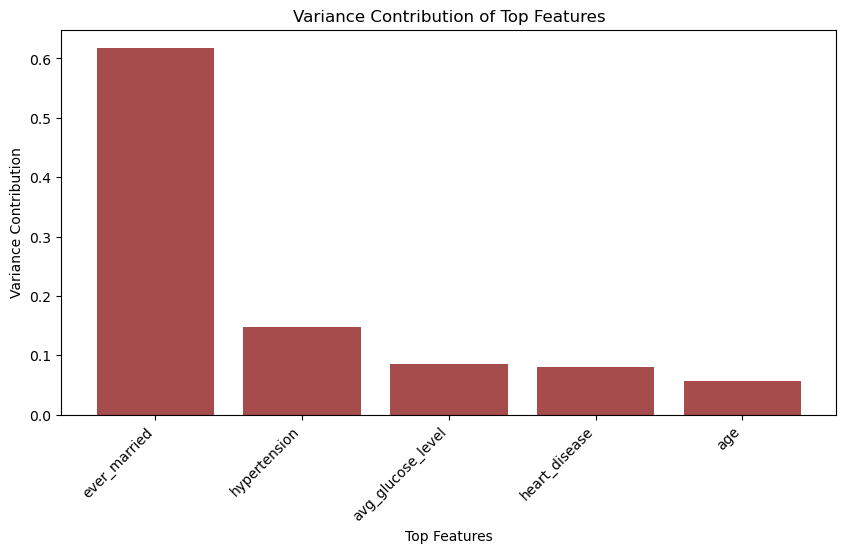

In [620]:
top_features = top_features_per_pc.unique()
top_feature_variances = [pca.explained_variance_ratio_[i] for i in range(len(top_features))]


plt.figure(figsize=(10, 5))
plt.bar(top_features, top_feature_variances, alpha=0.7, align='center', color='maroon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Features')
plt.ylabel('Variance Contribution')
plt.title('Variance Contribution of Top Features')
plt.show()

### Saving the cleaned dataset to a csv file

In [621]:
df.to_csv("Cleaned-stroke-data.csv", index=False)

# Basic Data Visualization

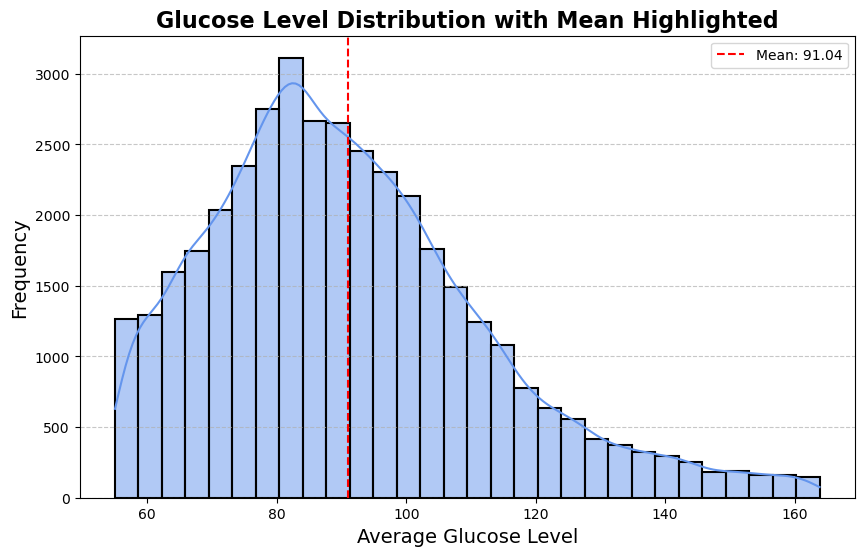

In [622]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_glucose_level'], kde=True, color='cornflowerblue', bins=30, linewidth=1.5)

mean_glucose = df['avg_glucose_level'].mean()

plt.axvline(mean_glucose, color='red', linestyle='--', label=f'Mean: {mean_glucose:.2f}')
plt.title("Glucose Level Distribution with Mean Highlighted", fontsize=16, fontweight='bold')
plt.xlabel("Average Glucose Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

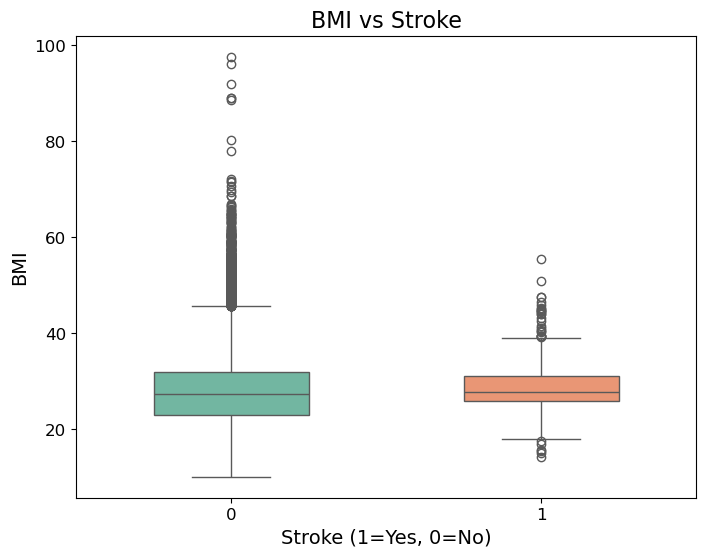

In [623]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='stroke', y='bmi', hue='stroke', palette='Set2', width=0.5, legend=False)

plt.title("BMI vs Stroke", fontsize=16)
plt.xlabel("Stroke (1=Yes, 0=No)", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

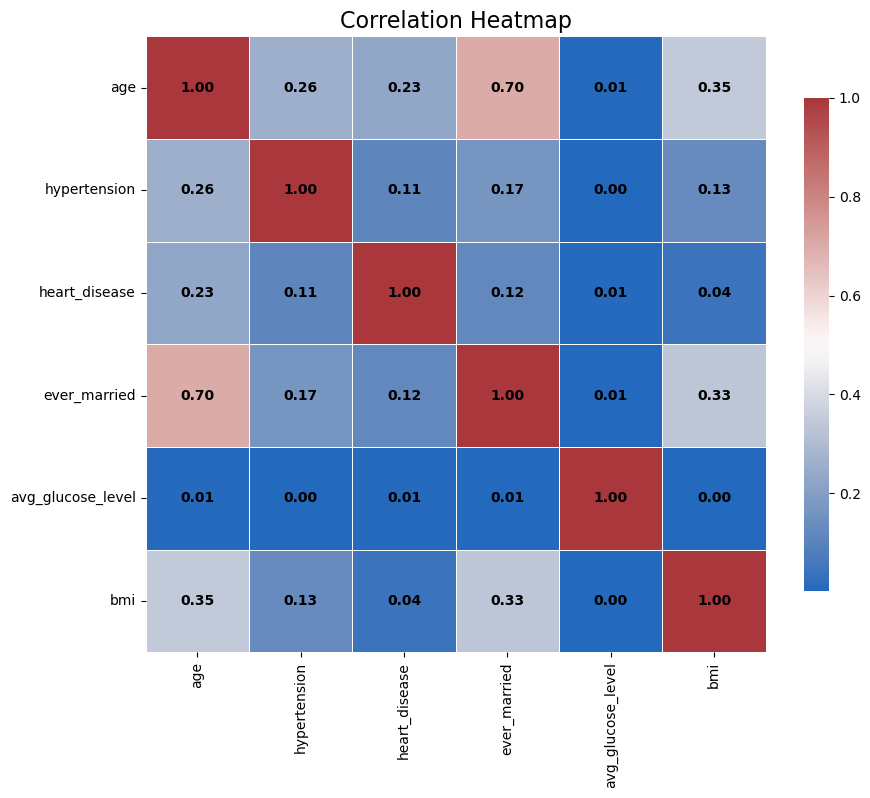

In [624]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt='.2f',
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='white',
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

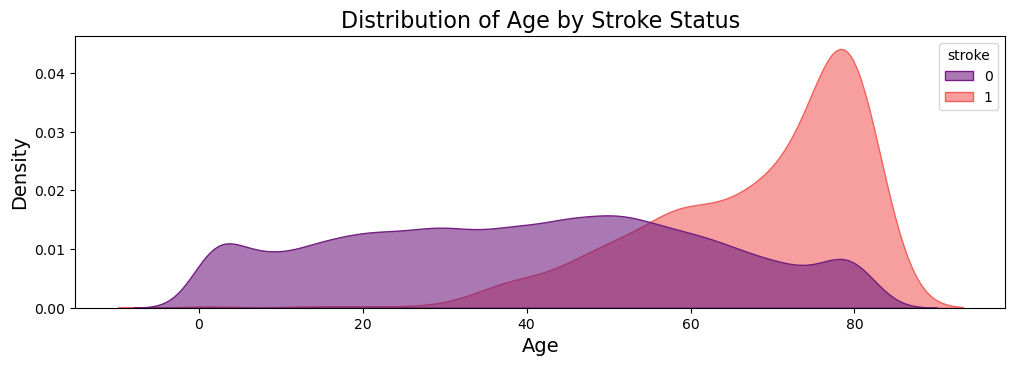

In [625]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='magma')
plt.title("Distribution of Age by Stroke Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

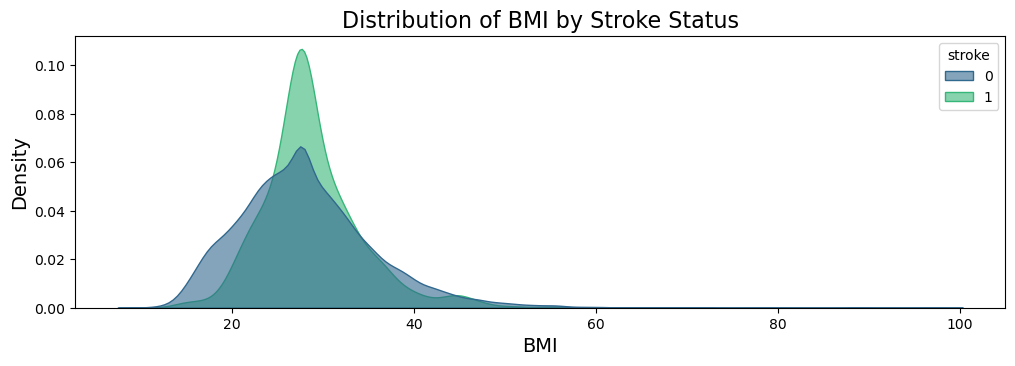

In [626]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='viridis')
plt.title("Distribution of BMI by Stroke Status", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

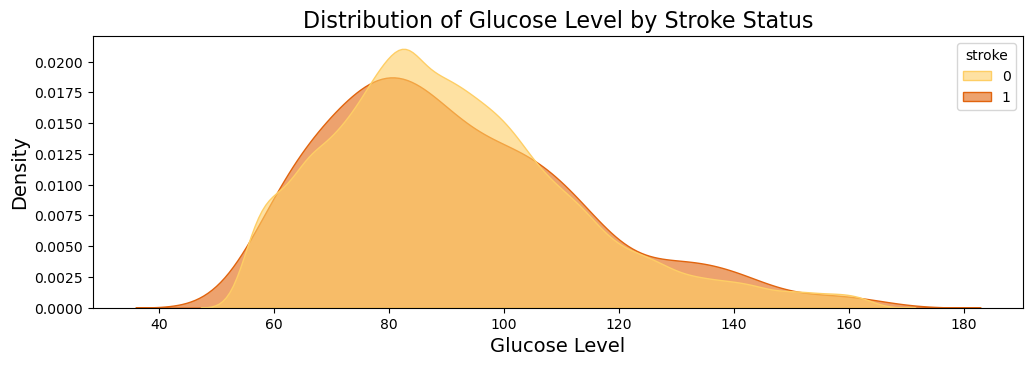

In [627]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='YlOrBr')
plt.title("Distribution of Glucose Level by Stroke Status", fontsize=16)
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()